<a href="https://colab.research.google.com/github/ahorvath008/Internal-Audit/blob/main/Risk_Management_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Overview and Project Descriptions

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Imports and data input

In [6]:
# Import the file from Google Drive
file = ('/content/drive/MyDrive/(ERM) All Risks.xlsx') 
df = pd.read_excel(file)
df.head(5)

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Created Date,Record Name,Risk Headline,Final Likelihood Score,Final Impact Score,Risk Score,Final Risk Decision,Principal Risk,Risk Description,Actual Risk Owner,...,Risk Submitter,Climate-Related Risk?,High Risk Counter,Low Risk Counter,Medium Risk Counter,Remediation Owner,Risk Score (For Group),Risk Score (for Report),Is this a Business Continuity Risk?,Is this risk linked to an OKR?
0,2020-06-26 11:18:09,Risk-1,Inadequate Patch and Vulnerability Management ...,2,4,Medium (8),Accept,IT Systems and Cybersecurity,Trainline's systems may suffer a breach as a r...,Mun Valiji <mun.valiji@thetrainline.com>,...,NaN,NaN,1.0,0.0,0.0,NaN,-1,Total (1),No,NaN
1,2020-06-26 11:18:09,Risk-1,Inadequate Patch and Vulnerability Management ...,5,4,High (20),Remediate,IT Systems and Cybersecurity,Trainline's systems may suffer a breach as a r...,Mun Valiji <mun.valiji@thetrainline.com>,...,NaN,NaN,1.0,0.0,0.0,NaN,-1,Total (1),No,NaN
2,2020-06-26 11:18:09,Risk-1,Inadequate Patch and Vulnerability Management ...,1,1,Negligible Risk (-1),Close Risk,IT Systems and Cybersecurity,Trainline's systems may suffer a breach as a r...,Mun Valiji <mun.valiji@thetrainline.com>,...,NaN,NaN,1.0,0.0,0.0,NaN,-1,Total (1),No,NaN
3,2020-06-26 11:21:13,Risk-2,Breach of data protection legislation UK and F...,3,5,Medium (15),Remediate,Compliance,Trainline breach data protection legislation,Becky Turner <rebecca.turner@thetrainline.com>,...,Steven Green <steven.green@thetrainline.com>,NaN,1.0,0.0,0.0,NaN,16,Total (1),No,No
4,2020-06-26 11:21:13,Risk-2,Breach of data protection legislation UK and F...,4,4,High (16),Accept,Compliance,Trainline breach data protection legislation,Becky Turner <rebecca.turner@thetrainline.com>,...,Steven Green <steven.green@thetrainline.com>,NaN,1.0,0.0,0.0,NaN,16,Total (1),No,No


#2. Data Wrangling and Initial Clean-up


In [7]:
# Remove Closed risks and risks with a lower score than a 0 (i.e. negligible risk)
df = df[df['Final Risk Decision'] != 'Close Risk' ]
df = df[df['Risk Score (For Group)'] > 0 ]

#3. Principal Risks

In [8]:
# Review the Principal Risks
df_principal = df[['Principal Risk', 'Risk Score (For Group)']]
df_principal_group = df_principal.groupby(['Principal Risk'], as_index=False).sum()
df_principal_group.sort_values(by='Risk Score (For Group)')

,Principal Risk,Risk Score (For Group)
5,Prolonged COVID-19,29
3,Market Shock / Economic Disruption,101
6,Regulatory and Political Environment,164
4,People,166
7,Supply and Partnerships,175
0,Competitive Landscape,332
1,Compliance,416
2,IT Systems and Cybersecurity,631


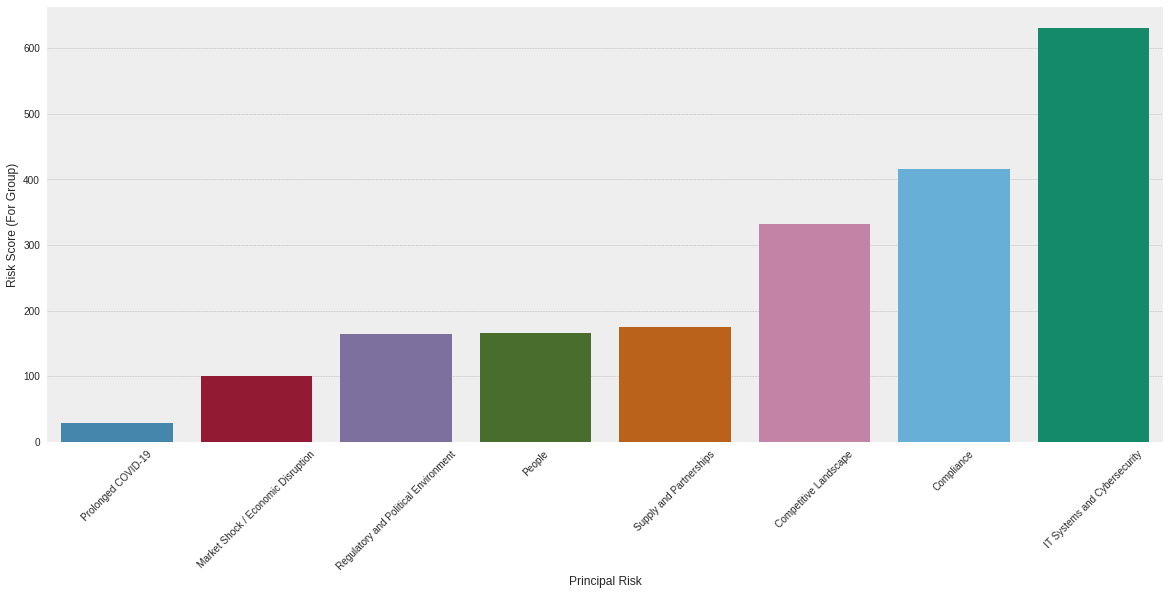

In [20]:
# Graph out the Principal Risks
df_principal_group_sorted = df_principal_group.sort_values(by='Risk Score (For Group)')
plt.figure(figsize=(20,8))
plt.style.use('bmh')
sns.barplot(data=df_principal_group_sorted, x='Principal Risk', y='Risk Score (For Group)')
plt.xticks(rotation=45)
plt.show()

#4. Functional Risks

In [10]:
# Review the Functional Risk Register scores
df_function = df[['Risk Register', 'Risk Score (For Group)']]
df_function_group = df_function.groupby(['Risk Register'], as_index=False).sum()
df_function_group.sort_values(by='Risk Score (For Group)')

,Risk Register,Risk Score (For Group)
6,Tax,87
2,Legal,105
4,Product,128
5,Regulatory,143
3,People,155
0,Commercial,186
1,Finance,230
8,Trainline Partner Solutions (TPS),256
7,Technology,724


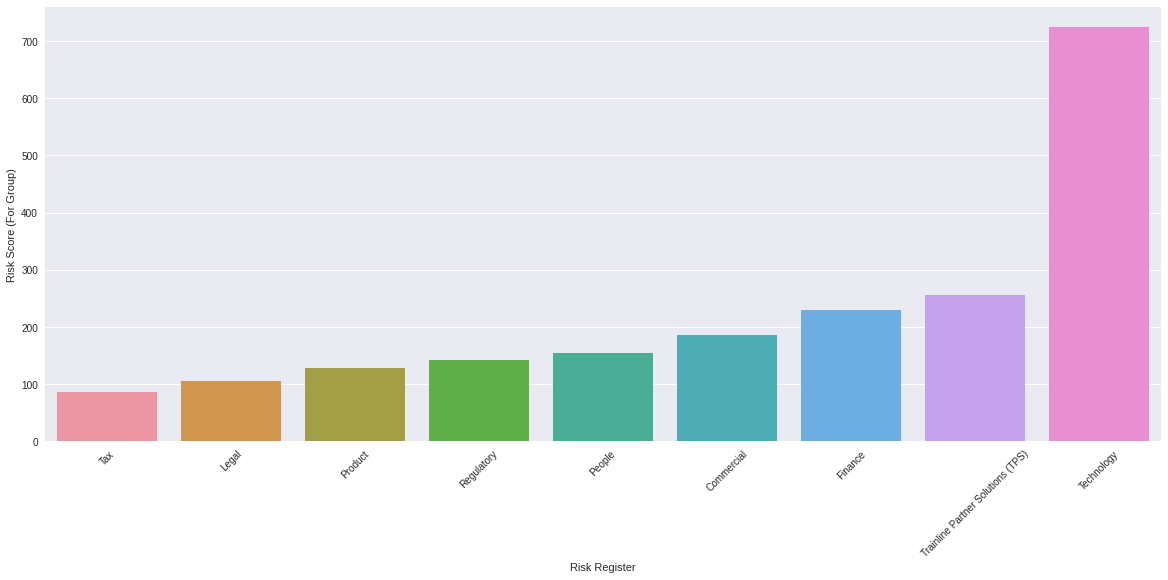

In [19]:
# Graph out the Functional Risks
df_sorted_by_score = df_function_group.sort_values(by='Risk Score (For Group)')
plt.figure(figsize=(20,8))
plt.style.use('seaborn')
sns.barplot(data=df_sorted_by_score, x='Risk Register', y='Risk Score (For Group)')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Pull out and analyise risk treatment data
df_treat = df[['Final Risk Decision', 'Risk Score (For Group)']]
df_treat_group = df_treat.groupby(['Final Risk Decision'], as_index=False).sum()
df_treat_group.head(5)


,Final Risk Decision,Risk Score (For Group)
0,Accept,583
1,Not Decisioned,13
2,Remediate,1418


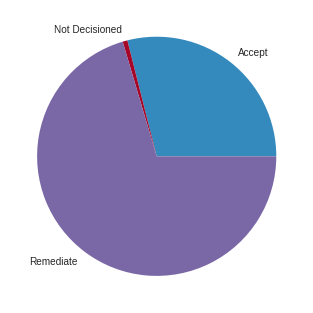

In [13]:
# Assess the overal breakdown of risks treatment
plt.style.use('bmh')
plt.pie(df_treat_group['Risk Score (For Group)'],labels=("Accept", "Not Decisioned", "Remediate"))
plt.show()

In [14]:
# Count risk owners 



In [15]:
# Assess which year risks have been created to check if new risks are still being added